In [2]:
pip install gensim


  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=b0cc9e691cee41d9f4af6ad0bb50c92b4d7111e29bee6a47a845f9dc7b6d93d5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json
from tqdm.notebook import tqdm
from gensim.models import CoherenceModel

In [2]:
from gensim import corpora, models
import gensim

In [3]:
df = pd.read_json('C:\\Users\\user\Desktop\\after_tokenizing.json', encoding='utf-8')
df

,date,text,stopped_text,token
0,2005-01-01,역시 큰 사고 때면 어김없이 동포애를 재확인할 수 있군요. 이번 지진ㆍ해일 참사에 ...,사고 때 동포애 확인 수 이번 지진 참사 희생 한국인 수색 작업 참가 사람 온정 손...,"[사고, 때, 동포, 확인, 수, 이번, 지진, 참사, 희생, 한국인, 수색, 작업..."
1,2005-01-02,에어컨 시장의 국내시장점유율 1위는 LG전자의 휘센이다. 회오리바람을 뜻하는 Whi...,에어컨 시장 국내 시장 점유 전자 휘 센 회오리바람 뜻 전달 의미 결합 휘 센 처음...,"[에어컨, 시장, 국내, 시장, 점유, 전자, 휘, 센, 회오리바람, 뜻, 전달, ..."
2,2005-01-02,차세대 이동통신 규격을 둘러싼 세계 통신업계의 주도권 다툼이 본격화할 움직임이 보이...,차세대 이동 통신 규격 세계 통신업 주도 다툼 본격 움직임 업체 이동 통신 사업자 ...,"[차세대, 이동, 통신, 규격, 세계, 통신업, 주도, 다툼, 본격, 움직임, 업체..."
3,2005-01-02,광주시가 97년 IMF 체제 이후 처음으로 세수 목표 달성에 실패해 경제 불황 여파...,광주 시가 체제 이후 처음 세수 목표 달성 실패 경제 불황 여파 반영 광주시 세수 ...,"[광주, 시가, 체제, 이후, 처음, 세수, 목표, 달성, 실패, 경제, 불황, 여..."
4,2005-01-02,국내 휴대전화 생산업체들이 GSM 특허를 보유하고 있는 외국 주요 업체들과 로열티 ...,국내 휴대 전화 생산 업체 특허 보유 외국 주요 업체 로열티 계약 경우 로열티 비용...,"[국내, 휴대, 전화, 생산, 업체, 특허, 보유, 외국, 주요, 업체, 로열티, ..."
...,...,...,...,...
184771,2020-10-08,일본의 수출규제가 국내 반도체와 디스플레이 산업 체질을 개선하는데'전화위복'이 된 ...,일본 수출 규제 국내 반도체 디스플레이 산업 체질 개선 전화위복 가운데 국내 증시 ...,"[일본, 수출, 규제, 국내, 반도체, 디스플레이, 산업, 체질, 개선, 전화위복,..."
184772,2020-10-08,원격 지원 소프트웨어 업체의 성장세가 가파르다. 재택근무 등이 활성화되면서 회사의 ...,원격 지원 소프트웨어 업체 성장세 재택근무 등 활성 회사 소프트웨어 사용 기업 코로...,"[원격, 지원, 소프트웨어, 업체, 성장세, 재택근무, 등, 활성, 회사, 소프트웨..."
184773,2020-10-08,나노소재 기반의 소재·부품기업인 아모 그린 텍이 신종 코로나 바이러스감염증이라는 암...,나노 소재 기반 소재 부품 기업 아모 텍 신종 코로나 바이러스 감염증 암초 전방 시...,"[나노, 소재, 기반, 소재, 부품, 기업, 아모, 텍, 신종, 코로나, 바이러스,..."
184774,2020-10-08,니콜라는 최근 1개월 사이 전 세계에서 가장 주목을 많이 받은 기업이다. 미국의 수...,니콜라 최근 사이 전 세계 주목 기업 미국 수소 연료전지 트럭 제조사 창업자 트레인...,"[니콜라, 최근, 사이, 전, 세계, 주목, 기업, 미국, 수소, 연료전지, 트럭,..."


In [11]:
data =df['token']
data = [[y for y in x if not len(x)==1]
       for x in data]
dictionary= corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

co = []
pe =[]
for i in tqdm(range(35, 45)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    co_model_lda = CoherenceModel(model=ldamodel, texts=data, dictionary=dictionary, topn=10)
    coherence_lda=co_model_lda.get_coherence()
    co.append(coherence_lda)
    pe.append(ldamodel.log_perplexity(corpus))

In [14]:
print(co)
print(pe)

[0.598344186728307, 0.5903894499558561, 0.6202365934313083, 0.5934182265441412, 0.6037848004881803, 0.5744121049837775, 0.5971642082188975, 0.595017709460057, 0.6024089286184741, 0.5893789384064841]
[-9.470457165630691, -9.534630890988375, -9.60380034828312, -9.660895533418488, -9.727732540663327, -9.799715911300245, -9.860546533483545, -9.928044912190561, -9.975544666355955, -10.055529232747634]


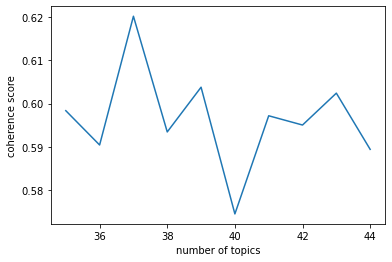

In [12]:
x = range(35, 45)
plt.plot(x, co)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

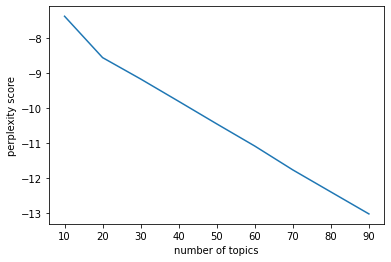

In [10]:
x = range(10, 100, 10)
plt.plot(x, pe)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

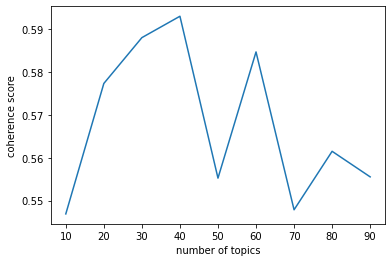

In [9]:
x = range(10, 100, 10)
plt.plot(x, co)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

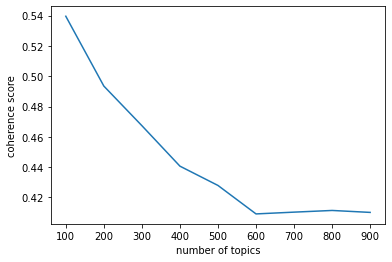

In [5]:
x = range(100, 1000, 100)
plt.plot(x, co)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

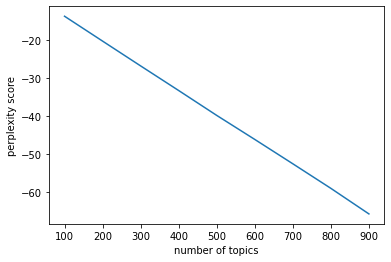

In [6]:
x = range(100, 1000, 100)
plt.plot(x, pe)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()